# Скорость
# dx трапеция

In [4]:
import math

import cv2
from IPython.display import Image

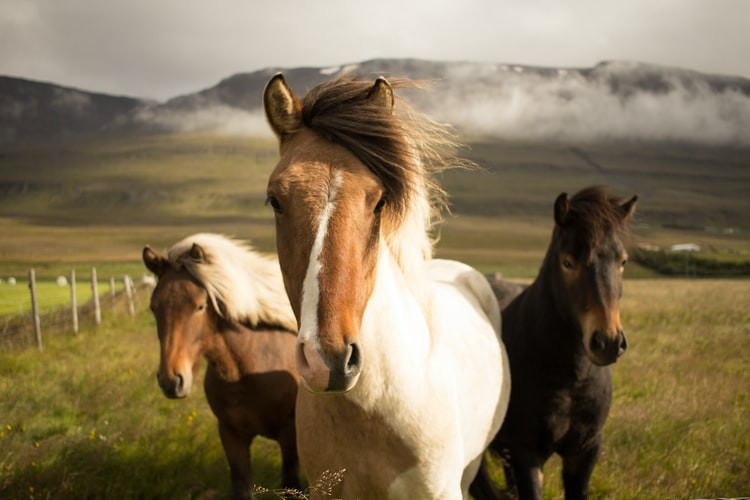

In [2]:
Image(filename='1.jpeg')

In [19]:
image = cv2.imread("1.jpeg")

KeyboardInterrupt: 

In [ ]:

def velocity(angle, peaks):
    #   frames  - матрица для каждого кадра со значением цветов RGB
    #   peaks   - положения пиков интенсивности на гранях отверстий
    #   angle   - угол поворота в рад (по часовой +, против -)
    
    new_peaks = []      # повернутая система координат k - номер кадра, i - номер пика,
                        #   = координата пика
    dist = [[]]         # расстояния между пиками
    dx = 0              # сторона усеченной пирамиды
    
    for k in range(2): 
        dist.append()
        temp = []
        for i in range(3):
            temp.append((peaks[k][i][1]+peaks[k][i][0]/math.cos(angle))*(math.cos(angle)+math.sin(angle)*math.tan(angle))**(-1))
            try:
                dist[k][i] = temp[-1] - dist[k][i]
            except:
                pass
            dist[k].append(temp[-1])
        
        new_peaks.append(temp)

    #   проверка на потерю пика у края кадра
    if dist[0][0]>dist[1][0]:
        dx = new_peaks[0][1] - new_peaks[1][1]
    else:
        dx = new_peaks[0][0] - new_peaks[0][1]
    
    return dx # Кол-во пикселей

def trapezoid(frame, angle, dx):
    #   frames  - матрица для каждого кадра со значением цветов RGB
    #   angle   - угол поворота в рад (по часовой +, против -)
    
    center_x = len(frame[0])-1
    center_y = len(frame)-1
    
    rad_inner = center_y-dx
    
    trap=[[[]]]
    frame_copy = frame.copy()
    phi = 0
    radius = center_y - dx
    while(phi<2*math.pi):
        trap.append()
        radius += 1
        while radius > rad_inner:
            for i in range(radius*2*math.pi):
                trap[i][]